In [1]:
import pykonal
import segyio
import segyio
import gc
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
#Speed
vp = np.zeros((250,500, 1))
vp[:,:150, :] = 1.5
vp[:,150:200, :] = 2.2
vp[:,200:400, :] = 2.5
vp[:,400:, :] = 3
#Pykonal
mshape = vp.shape

In [3]:
#Source 
src_idxs = ((0, 0, 0), (125, 0, 0), (249, 0, 0))
for src_idx in src_idxs:
    #Setting model
    solver = pykonal.EikonalSolver(coord_sys="cartesian")
    solver.velocity.min_coords = 0, 0, 0
    solver.velocity.node_intervals = 0.01, 0.01, 0.01
    solver.velocity.npts = mshape[0], mshape[1], 1
    solver.velocity.values = vp
    #travel time at source is zero
    solver.traveltime.values[src_idx] = 0
    solver.unknown[src_idx] = False
    # Push the index of the source node onto the narrow-band heap.
    solver.trial.push(*src_idx)
    # Solve the system.
    solver.solve()
    #сохранение всего поля времен
    np.save(r'Results\Grine\Source\time_field_'+
                              str(src_idx).strip('()').replace(', ','_'),
                              solver.traveltime.values.reshape(250,500))
    gc.collect()

In [4]:
#Reciever 
rec_idxs = ((0, 0, 0), (62, 0, 0), (125, 0, 0), (187, 0, 0), (249, 0, 0))
for rec_idx in rec_idxs:
    #Setting model
    solver = pykonal.EikonalSolver(coord_sys="cartesian")
    solver.velocity.min_coords = 0, 0, 0
    solver.velocity.node_intervals = 0.01, 0.01, 0.01
    solver.velocity.npts = mshape[0], mshape[1], 1
    solver.velocity.values = vp
    #travel time at source is zero
    solver.traveltime.values[rec_idx] = 0
    solver.unknown[rec_idx] = False
    # Push the index of the source node onto the narrow-band heap.
    solver.trial.push(*rec_idx)
    # Solve the system.
    solver.solve()
    #сохранение всего поля времен
    np.save(r'Results\Grine\Reciever\time_field_'+
                              str(rec_idx).strip('()').replace(', ','_'),
                              solver.traveltime.values.reshape(250,500))
    gc.collect()

In [11]:
src_pth = glob(r'Results\Grine\Source\*.npy')
rec_pth = glob(r'Results\Grine\Reciever\*.npy')

for src in src_pth:
    src_tf = np.load(src)

    for rec in rec_pth:
        rec_tf = np.load(rec)
        np.save(r'Results\Grine\Grine_function_src-'+
                src.split('\\')[-1].strip('time_field.npy')+
                '_rec-'+
                rec.split('\\')[-1].strip('time_field.npy'),
                src_tf + rec_tf)

In [44]:
rec

'Results\\Grine\\Reciever\\time_field_62_0_0.npy'

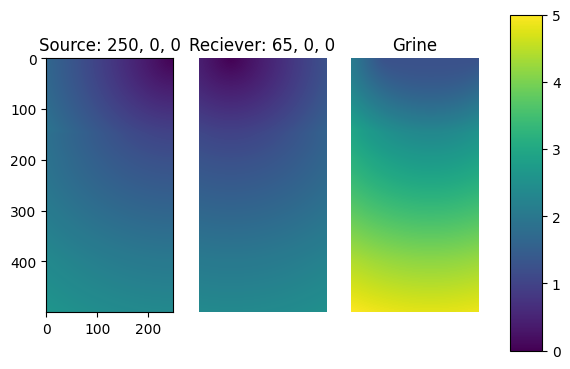

In [45]:
fig, axs = plt.subplots(1,3)
im = axs[0].imshow(src_tf.T, vmin=0, vmax=5)
axs[0].set_title('Source: 250, 0, 0')

axs[1].imshow(rec_tf.T, vmin=0, vmax=5)
axs[1].axis('off')
axs[1].set_title('Reciever: 65, 0, 0')

axs[2].imshow((src_tf + rec_tf).T, vmin=0, vmax=5)
axs[2].axis('off')
axs[2].set_title('Grine')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

